### **Load Images**

In [23]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
train_dir = os.path.abspath("datasets/Brain-Tumor-Classification-2D")

# Define labels
tumor_labels = ["Astrocytoma"]
# tumor_labels = ["Astrocytoma", "Glioblastoma", "Gliomas", "Meningioma", "Neurocytoma"]

IMG_SIZE = (256, 256)

# Initialize lists
X, y = [], []

# Iterate over dataset directories
for label in tumor_labels:
    label_path = os.path.abspath(os.path.join(train_dir, label))
    print(f"label_path: {label_path}")

    if not os.path.isdir(label_path):
        print(f"Skipping non-folder: {label_path}")
        continue

    # List files in the label directory
    folder_contents = os.listdir(label_path)

    for filename in sorted(folder_contents):
        img_path = os.path.join(label_path, filename)

        if not os.path.isfile(img_path):                    # Skip non-image files
            print(f"Skipping non-image file: {img_path}")   # Debugging
            continue

        # Generate two possible mask filenames: one with '_mask' and one with 'mask_'
        mask_filename_1 = filename.replace(".tif", "_mask.tif")    # Using '_mask' naming convention
        mask_filename_2 = filename.replace(".tif", "mask_.tif")    # Using 'mask_' naming convention

        mask_path_1 = os.path.join(label_path, mask_filename_1)
        mask_path_2 = os.path.join(label_path, mask_filename_2)

        # Check if either mask file exists
        mask_path = None
        if os.path.exists(mask_path_1):
            mask_path = mask_path_1
        elif os.path.exists(mask_path_2):
            mask_path = mask_path_2

        if mask_path:
            try:
                # Load and preprocess image in grayscale
                img = load_img(img_path, target_size=IMG_SIZE, color_mode="grayscale")
                img = img_to_array(img) / 255.0  # Normalize image
                img = img.squeeze()  # Remove redundant dimension

                # Load grayscale mask
                mask_img = load_img(mask_path, target_size=IMG_SIZE, color_mode="grayscale")
                mask_img = img_to_array(mask_img).squeeze() / 255.0  # Normalize mask

                # Append to dataset
                X.append(img)
                y.append(mask_img)  # Target remains tumor mask

            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert to numpy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

print(f"Dataset Loaded (X, y): {X.shape}, {y.shape}")  # (num_samples, 256, 256, 1) and (num_samples, 256, 256)

label_path: c:\Users\ilhag\Desktop\CV-MiniProject\Project#1\datasets\Brain-Tumor-Classification-2D\Astrocytoma
Dataset Loaded (X, y): (529, 256, 256), (529, 256, 256)


### **Data Splitting**

In [24]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# print(f"Training set: {len(X_train)} images, Validation set: {len(X_val)} images", '\n')
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"X_val shape: {X_val.shape}")
# print(f"y_val shape: {y_val.shape}")

### **Import Models**

In [25]:
import os

# Directory containing your .h5 models
model_dir = "models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith('.h5')]

### **Evaluation**

Evaluating model: almostThere_tumor2.10e-16bs_1e-4.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step


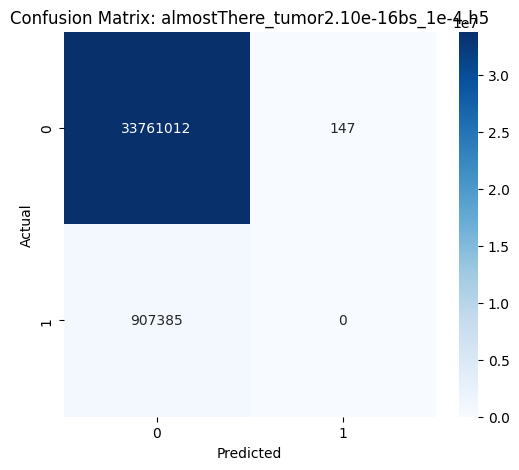

Evaluating model: finally_tumor2.20e-8bs_1e-4.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 167s 10s/step


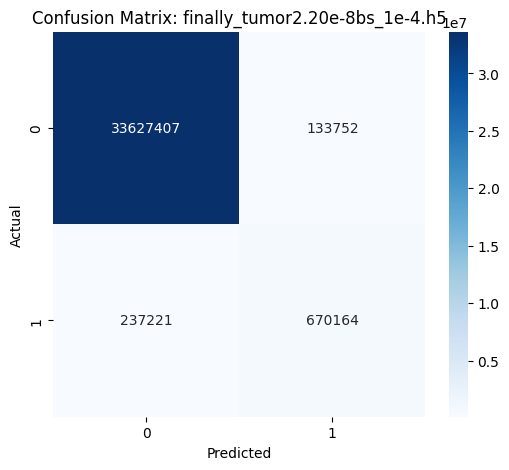

Evaluating model: finally_tumorsegm-1.20.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 270s 16s/step


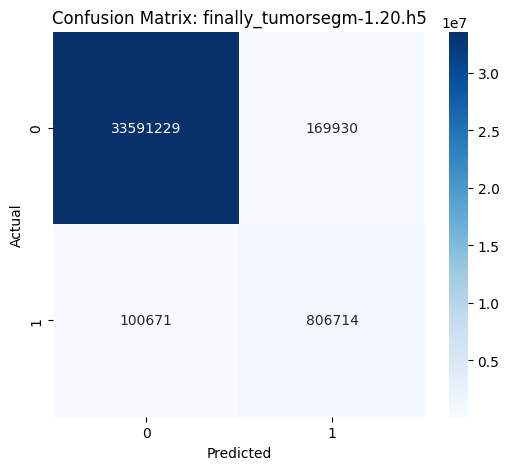

Evaluating model: nope_tumor1.20e-8bs_1e-4.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step


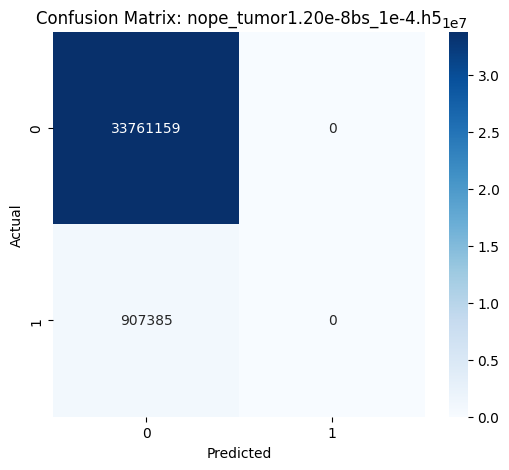

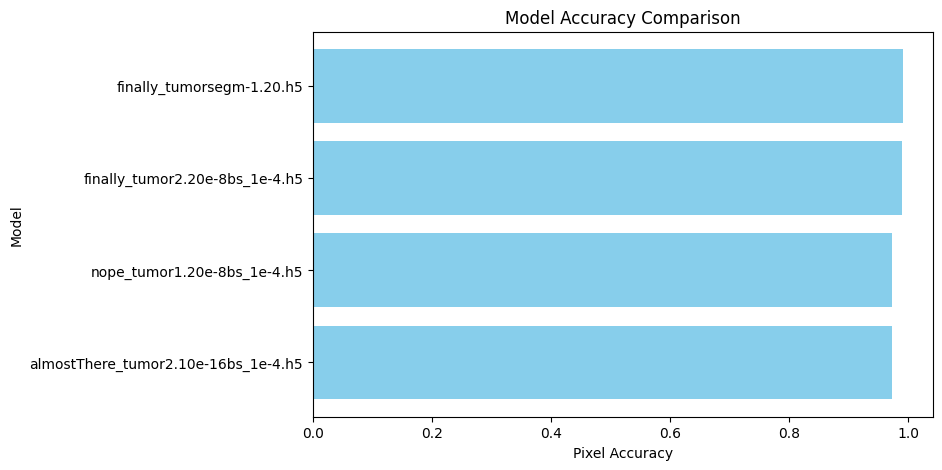

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Ensure X_test and y_test are defined
X_test = X
y_test = y

accuracies = []

# Evaluate
for model_file in model_files:
    print(f"Evaluating model: {model_file}")
    
    model_path = os.path.join(model_dir, model_file)
    model = load_model(model_path)

    # Predict and threshold
    y_pred = model.predict(X_test)  # Output shape: (106, 256, 256, 1)
    y_pred = (y_pred > 0.5).astype(np.uint8).squeeze()  # Convert to 0/1

    # Compute pixel-wise accuracy
    pixel_accuracy = np.mean(y_pred == y_test)
    accuracies.append((model_file, pixel_accuracy))
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test.flatten(), y_pred.flatten())
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_file}")
    plt.show()

# Sort models by accuracy
accuracies.sort(key=lambda x: x[1], reverse=True)

# Accuracy Plot
plt.figure(figsize=(8, 5))
plt.barh([x[0] for x in accuracies], [x[1] for x in accuracies], color="skyblue")
plt.xlabel("Pixel Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.show()


Testing model: almostThere_tumor2.10e-16bs_1e-4.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


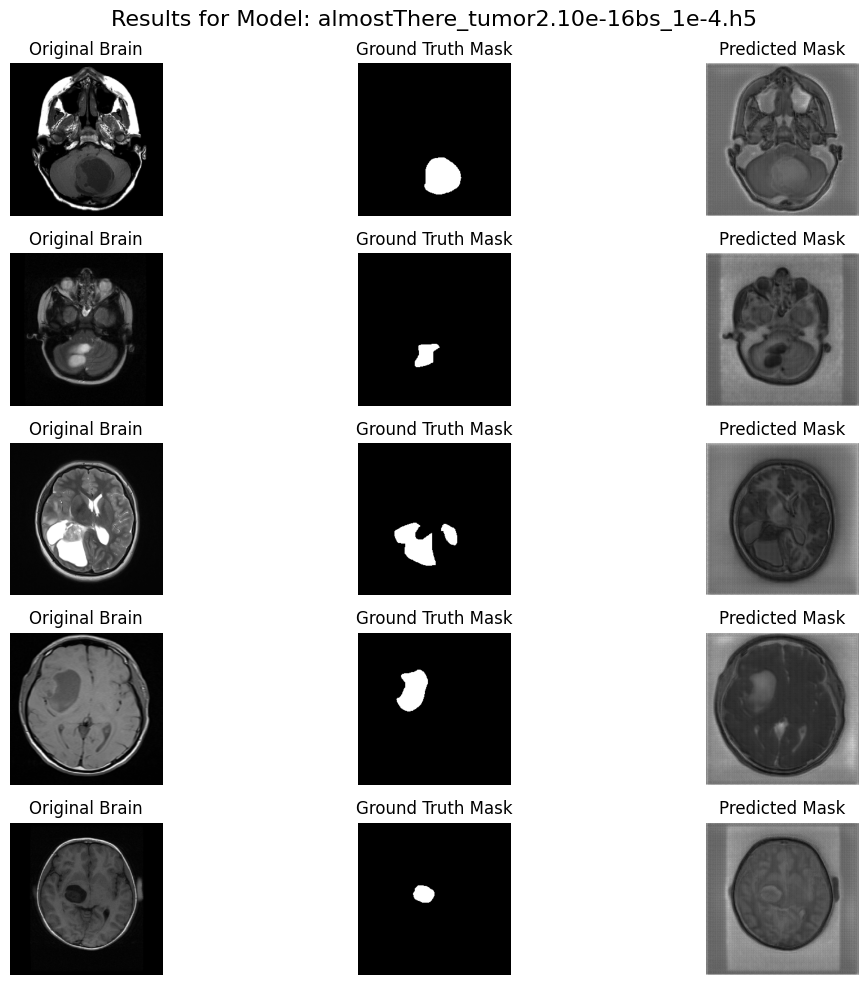

Testing model: finally_tumor2.20e-8bs_1e-4.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


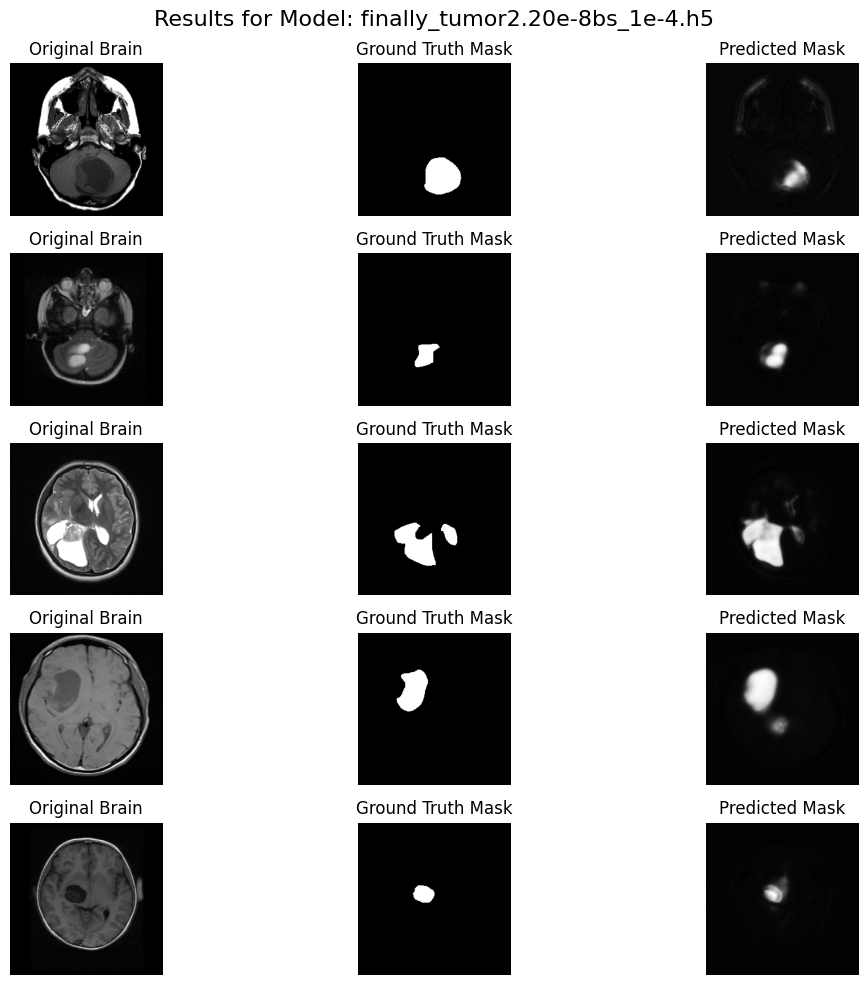

Testing model: finally_tumorsegm-1.20.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


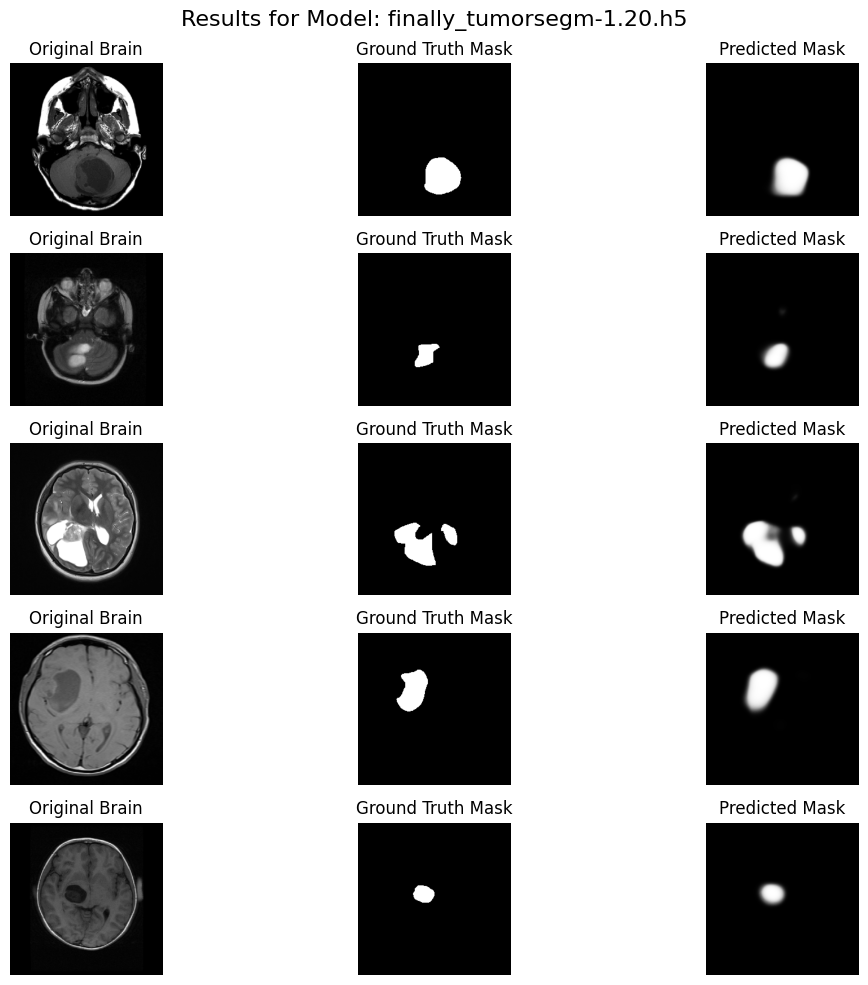

Testing model: nope_tumor1.20e-8bs_1e-4.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


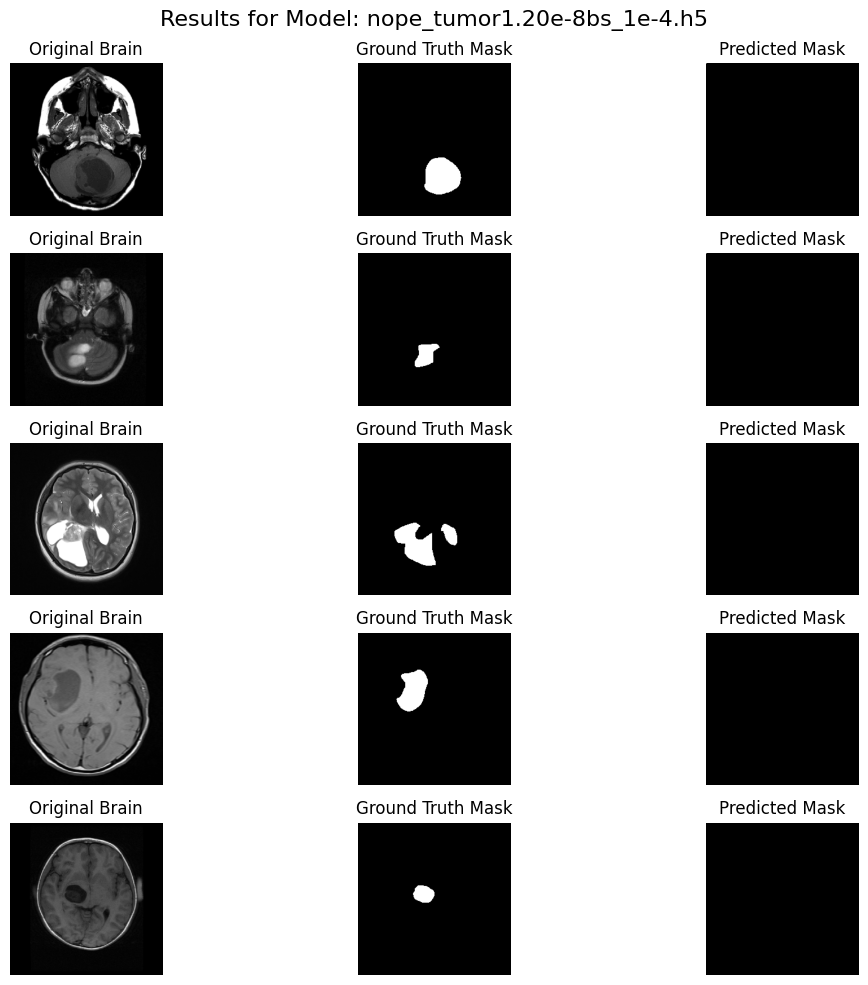

In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Directory containing your .h5 models
model_dir = "models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith('.h5')]

num_samples = min(5, len(X))
indices = np.random.choice(len(X), num_samples, replace=False)

# Iterate through each model and test
for model_file in model_files:
    print(f"Testing model: {model_file}")
    model_path = os.path.join(model_dir, model_file)
    model = load_model(model_path)

    # num_samples = min(2, len(X))
    # indices = np.random.choice(len(X), num_samples, replace=False)

    fig, axes = plt.subplots(num_samples, 3, figsize=(12, 10))

    for i, idx in enumerate(indices):
        brain = X[idx]        # Original image
        tumor = y[idx]        # Ground truth tumor mask

        # Predict the segmentation mask
        pred_mask = model.predict(np.expand_dims(brain, axis=0))
        pred_mask = pred_mask.squeeze()

        # Display original brain scan
        axes[i, 0].imshow(brain, cmap="gray")
        axes[i, 0].set_title("Original Brain")
        axes[i, 0].axis("off")

        # Display ground truth tumor mask
        axes[i, 1].imshow(tumor, cmap="gray")
        axes[i, 1].set_title("Ground Truth Mask")
        axes[i, 1].axis("off")

        # Display predicted mask
        axes[i, 2].imshow(pred_mask, cmap="gray")
        axes[i, 2].set_title("Predicted Mask")
        axes[i, 2].axis("off")

    plt.suptitle(f"Results for Model: {model_file}", fontsize=16)
    plt.tight_layout()
    plt.show()


